# Lecture 5: Manipulating & Plotting 3D fMRI arrays: Volumes

## Goals
- **Neuroscience / Neuroimaging concepts**
    - Pycortex module
    - Cortical Segmentation
    - Flatmaps
- **Datascience / Coding concepts**
    - Subsetting 4D arrays: Indexing
    - Creating 3-D arrays: `np.stack`
    - Subsetting 3D arrays: Slicing
    - Subsetting 4D arrays: Masking
    - Retrieving cortical masks
    - Visualizing 3-D fMRI Volume data: Multiple 2-D images
    - Interactive Cortical Surface Maps for 3-D fMRI Volume data 
    - Visualizing 3-D fMRI Volume data: Flatmaps

# Key Terms and Concepts

Below is a list of the key terms and concepts you should know after this lecture. The list below are links to the sections of the notebook where you can learn more about each term/concept.

<br/>
<div style="font-size:15pt;">
    
1. [4-D Array Indexing to select Volumes and Collections of Voxel Time Series](#4D_Indexing) <br/>
2. [Descriptive Statistics of 4-D fMRI Arrays](#4D_Descriptive) <br/>
3. [Creating 3-D arrays using `np.stack`](#3D_Stack) <br/>
4. [Slicing 3-D Arrays](#3D_Slicing) <br/>
5. [Extracting slices from 3-D Volumes](#3D_Slicing_fMRI) <br/>
6. [Masking](#Masking) <br/>
7. [Logical Operators](#Logical_Operators) <br/>
8. [Masking Reduces Dimensionality](#Masking_Dimensionality) <br/>
9. [Brain Masks](#Brain_Masks) <br/>
10. [Cortical Masks](#Cortical_Masks) <br/>
11. [Pycortex](#Pycortex) <br/>
12. [Subplots](#Subplot) <br/>
13. [`for` loops](#For_Loops) <br/>
14. [Visualizing 3-D Volumes as multiple images](#Multiple_Images) <br/>
15. [Dynamic Cortical Surface Maps](#Dynamic_Cortical_Surface) <br/>
16. [Static Cortical Surface Maps (Flatmaps)](#Static_Cortical_Surface) <br/>


</div>

# Standard Imports

This cell will import the Python modules needed for today's lecture. Simply run this cell.

In [294]:
# Load some necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import nibabel

# Set plotting defaults
%matplotlib inline

# Review

This weeks review will be conceptual, and in the form of a survey. Go to the [notepad](https://drive.google.com/open?id=1o1xG3GG5qO8ffOEfCmDU6rGCxBURS_3PLQXBq9JII7w) for today's lecture to find the link.

# 3-D & 4-D  Array Manipulation

A fMRI **volume** is stored in a 3-D array, representing the voxel values in 3 spatial dimensions `(Z,Y,X)` at a single point in time. A 4-D **scan** (or **run**) of fMRI data consists of a time series of 3-D fMRI volumes, one 3-D volume for every point in time. When loading a nifti file we are really loading a 4-D **scan** of fMRI data.

When manipulating 3-D & 4-D arrays, the same subsetting techniques that we've already learned, namely indexing and slicing, apply as well. Additionally, to subset 4-D arrays, we will add **masking** to the listof subsetting techniques we know.

<a id="4D_Indexing"></a>
## Indexing 4-D Arrays

Indexing in 3-D arrays is not often done, and when it is, its use is indentical to that in 2-D arrays, namely to select a single voxel value. For that reason we'll skip indexing in 3-D and jumpy directly to the 4-D case, which is also similar to the 2-D case, with some caveats for dealing with fMRI data. 

While indexing can be used for many purposes in 4-D fMRI data arrays, the primary ways it is used is to extract the following:

1. A single voxel time series
2. A collection of voxel time series
3. A single volume

Let's load a 4-D **scan** worth of data from a single nifti file using the `nibabel` module, as we did a couple of weeks ago. We'll need to transpose the data so that the time dimension comes first! 

In [295]:
img = nibabel.load("/data/cogneuro/fMRI/categories/s01_categories_01.nii.gz")
data = img.get_data().T
data.shape

(120, 30, 100, 100)

We see the shape of the 4-D **scan** data is `(120,30,100,100)`. Since we've transposed the array, the axes represent `(Time, Space-Z, Space-Y, Space-X)`. Thus we have 120 3-D volumes, each of size `(30,100,100)`.

To get a single **voxel time series** from the entire scan's worth of data, we specify the `(z,y,x)` indices of the voxel, and then use the colon `:` in the time dimension to indicate we want all of the time points. Let's get the voxel at `(6,57,37)`.

In [296]:
timeseries = data[:,6,57,37]
timeseries.shape

(120,)

We see that we've retrieved a 1-D array that is 120 long, which is the same size as the time series we've been using in previous lectures.

We can also get a **collection of voxel time series** at arbitray indices. Let's see it:

In [297]:
timeseries_multi = data[:, [6, 10, 6, 10], [57, 62, 58, 62], [37, 40, 37, 39]]
timeseries_multi.shape

(120, 4)

How many voxel time series does this collection have? 4!

Now we can use indexing in the time dimension to get a single volume across all 3 space dimensions. Let's do that by getting the 5th volume, at index `4`.

In [298]:
volume_5 = data[4,:,:,:]
volume_5.shape

(30, 100, 100)

#### Breakout Session

1\. Using indexing, extract the time series of the voxel located at `(10,62,40)` and call it `timeseries2`. Print it's shape.

In [299]:
### STUDENT ANSWER
timeseries2 = data[:,10,62,40]
timeseries2.shape

(120,)

2\. Using indexing, extract the last volume from the **scan** we've loaded, and call it `volume_last`. Print it's shape.

In [300]:
### STUDENT ANSWER
volume_last = data[-1,:,:,:]
volume_last.shape

(30, 100, 100)

<a id="4D_Descriptive"></a>
## Descriptive statistics of 4-D arrays
When taking descriptive statistics of higher dimensional data, it is often necessary to specify an `axis` across which the calculation should be done. We saw this last week with 2-D arrays. 

When dealing with 4-D **scan** arrays, taking a descriptive statistic across time is useful for many things, including some preprocessing steps, as we'll learn next week. This results results in a single 3-D **volume** that represents the descriptive statistic value across the whole brain. For example, taking the mean across time results in a 3-D mean volume. Let's have a look at that below:

In [301]:
data.shape

(120, 30, 100, 100)

In [302]:
data_mean = data.mean(axis=0)
data_mean.shape

(30, 100, 100)

What would happen if we didn't specify the axis here? Let's see:

In [303]:
data.mean()

192.02118

We received a single value back, which represents the mean across all of time and space, in other words the mean across all 4 axes of the `data` array. That isn't what we want, and this small error can result in big problems! 

To illustrate this potential problem, let's imagine we want to remove the mean volume from the first volume. We'll extract the first volume, then subtract the mean image in a single line of code here:

In [ ]:
data[0,:,:,:] - data.mean()

In [304]:
volume_first_minus_mean_wrong = data[0,:,:,:] - data.mean()
volume_first_minus_mean_wrong.shape

(30, 100, 100)

This works (no errors), and returns a volume that is the right shape, but it is not what we wanted! That's because we took the mean across all time and space by excluding an `axis`. It didn't give us an error because we can always subtract a single number from an array!

Now let's do this the right way by specifying `axis=0`, telling numpy we want the mean across the time axis:

In [305]:
volume_first_minus_mean = data[0,:,:,:] - data.mean(axis=0)
volume_first_minus_mean.shape

(30, 100, 100)

Just to prove that these two lines of code give us different answers, let's look at the mean value, along with th first few values

In [306]:
print(data_mean[:10,0,0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [307]:
print(volume_first_minus_mean_wrong[:10,0,0])
print(volume_first_minus_mean[:10,0,0])

[-192.0211792 -192.0211792 -192.0211792 -192.0211792 -192.0211792
 -192.0211792 -192.0211792 -192.0211792 -192.0211792 -192.0211792]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


#### Breakout Session

1. Find the min and max values of each voxel across time. Print the shape of the results.

In [309]:
### STUDENT ANSWER
data_voxels_min = data.min(axis=0)
data_voxels_min = np.min(data,axis=0)
data_voxels_min.shape

(30, 100, 100)

<a id="3D_Stack"></a>
## Using `np.stack` to create 3-D arrays from 2-D arrays

Using `np.stack` to create 3-D arrays from a sequence of 2-D arrays is very similar to the way that we created a 2-D array from multiple 1-D arrays. Before we assemble a 3-D array using stack, let's look at one created using `np.random.randn`.

In [310]:
arr3D = np.random.randn(2, 3, 5)

In [311]:
arr3D

array([[[-1.16704348,  0.49196547,  0.39420643, -0.76602846,  0.83015351],
        [-0.49093204,  1.92394757, -1.17904989,  1.74805886, -1.07956617],
        [ 0.87902325, -0.10984852,  0.94937179, -0.96977657, -0.65302294]],

       [[ 0.62784054,  0.5149635 , -0.69628762, -0.10028315, -0.91198905],
        [-0.74481619, -1.02288372, -1.17288613,  0.73752223, -0.15468061],
        [-2.22643738, -0.18078866,  1.12308877,  0.06777499, -2.19380079]]])

We see that this 3-D array is constituted of two, 2-D arrays of shape `(3, 5)`. `numpy` will print the values of 3-D arrays when the array is small enough, and show it as a stack of 2-D arrays. The first axis of the 3-D array (the first entry of its `shape`) indicates how many 2-D arrays will be displayed when the 3-D array is printed. This  leads to an intuitive way of constructing 3-D arrays: by `np.stack`ing 2-D arrays! Let's take a look:

 Now, we'll create three 2-D arrays and print them out:

In [312]:
arr2D_1 = np.ones((4, 5))
arr2D_2 = np.ones((4, 5)) * 2
arr2D_3 = np.ones((4, 5)) * 3
print(arr2D_1)
print(arr2D_2)
print(arr2D_3)

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]]
[[ 3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.]]


To create a stacked 3-D array, we specify a container containing the 2-D arrays to stack, and the new axis to create. Just as in 1-D arrays, the axis that we specify will by as large as the number of 2-D arrays we pass in. In this example we are passing in three 2-D arrays, and specifying `axis=0`, so the first axis will by of size `3`. Let's have a look: 

In [313]:
arr3D_stacked0 = np.stack((arr2D_1, arr2D_2, arr2D_3), axis=0)
arr3D_stacked0.shape

(3, 4, 5)

But what are the other 2 dimensions in the shape? Well, they represent the size of the 2-D arrays that were passed in, namely `(4,5)`. Let's look at the actualy values in the array:

In [314]:
arr3D_stacked0

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.]],

       [[ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.]]])

It is printed just as if we called print 3 times in a row, as we did above.

We could stack along a different axis, which would lead to a 3-D array of a different shape, with the values organized in a different way. Here's what stacking on the last axis would look like:

In [315]:
arr3D_stacked2 = np.stack((arr2D_1, arr2D_2, arr2D_3), axis=-1)
arr3D_stacked2.shape

(4, 5, 3)

We see that the three 2-D arrays are stacked on the last (3rd) axis. Visualizing this it's not as easy to see what is happening, since we now see four 2-D arrays! 

To interpret how python will output the numbers, you can imagine that there are four 2-D arrays coming out of the monitor towards you. Then there are 3 columns of 2-D arrays, where each column is one of the original 2-D arrays that we stacked. That is why the first column of the four 2-D arrays below contains all `1`s, the second column contains all `2`s, and the third column contains all `3`s.

In [316]:
arr3D_stacked2

array([[[ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.]],

       [[ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.]],

       [[ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.]],

       [[ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.],
        [ 1.,  2.,  3.]]])

Stacking along `axis=1` will mean the shape of the resulting 3-D array will be 3 in the 2nd axis. Lets have a look

In [317]:
arr3D_stacked1 = np.stack((arr2D_1, arr2D_2, arr2D_3), axis=1)
arr3D_stacked1.shape

(4, 3, 5)

In [318]:
arr3D_stacked1

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.]]])

#### Breakout Session

1\. Create two 2-D arrays of size `(3,4)`, one containing all zeros called `arr2D_break1`, and one containing all ones called `arr2D_break2`

In [320]:
### STUDENT ANSWER
arr2D_break1 = np.zeros((3,4))
print(arr2D_break1)
arr2D_break2 = np.ones((3,4))
print(arr2D_break2)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


2\. Create a 3-D array called `arr3D_break` by stacking `arr2D_break1` and `arr2D_break2` in the first axis. Print it out.

In [321]:
### STUDENT ANSWER
arr3D_break = np.stack((arr2D_break1, arr2D_break2), axis=0)
arr3D_break

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]])

<a id="3D_Slicing"></a>
## Slicing 3-D arrays

Slicing in 3-D arrays is very similar to slicing in 2-D arrays. Just as in 2-D arrays we can choose to slice both axes, or a single axis, in 3-D slicing we can slice a single axis, two axes, or all 3 axes. We'll start with slicing a single axis and build up:

In [324]:
arr3D_stacked0

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.]],

       [[ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.]]])

When slicing a single axis in a 3-D array, the other two axes must be specified (using indexing), resulting a 1-D array. Let's start by taking a slice in `axis` 0, from the point `(0, 0)` fixed in the remaining 2 axes:

In [325]:
arr3D_stacked0.shape

(3, 4, 5)

In [323]:
arr3D_slice0 = arr3D_stacked0[:, 0, 0]
arr3D_slice0.shape

(3,)

In [326]:
arr3D_slice0

array([ 1.,  2.,  3.])

Likewise getting a slice from `axis` 1, keeping the indices 0 fixed in the other two axes, we would do:

In [327]:
arr3D_slice1 = arr3D_stacked0[0, :, 0]
arr3D_slice1.shape

(4,)

In [328]:
arr3D_slice1

array([ 1.,  1.,  1.,  1.])

Slicing on two axes will extract a 2-D array from the original 3-D array, while keeping the value of one axis fixed. Let's get the 2-D array stored in the first index of the first axis.

In [329]:
arr3D_slice2D_0 = arr3D_stacked0[0, :, :]
arr3D_slice2D_0.shape

(4, 5)

In [330]:
arr3D_slice2D_0

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [332]:
arr3D_stacked0

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.]],

       [[ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.]]])

In [331]:
arr2D_1

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

`arr3D_slice2D0` contains the same values as the first 2-D array (`arr2D_1`) that was stacked above to create the 3-D array, since we stacked on `axis=0`. 

Let's get 2-D arrays for the second and third axes:

In [333]:
arr3D_slice2D_1  = arr3D_stacked0[:, 1, :]
arr3D_slice2D_1

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.]])

In [334]:
arr3D_slice2D_2 = arr3D_stacked0[:, :, 2]
arr3D_slice2D_2

array([[ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.]])

#### Breakout Session

1\. Use slicing to get a 1-D array from the third axis of `arr3D_stacked0`, at the point `(2,2)` in the first 2 axes.

In [335]:
### STUDENT ANSWER
arr3D_stacked0_1Dslice = arr3D_stacked0[2,2,:]
arr3D_stacked0_1Dslice

array([ 3.,  3.,  3.,  3.,  3.])

2\. Use slicing to get a 2-D slice of `arr3D_stacked0` that has the same values as the third 2-D array (named `arr2D_3`) that was used when stacking `arr3D_stacked`.

In [337]:
### STUDENT ANSWER
arr3D_stacked0_2Dslice = arr3D_stacked0[2,:,:]
arr3D_stacked0_2Dslice

array([[ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.]])

<a id="3D_Slicing_fMRI"></a>
## Slicing 3-D fMRI data arrays (Volumes)

Slicing 3-D fMRI data arrays (or **volumes**) is generally only done to extract 2-D **slices**. These are the same **slices** that we dealt with in the last lecture, namely axial, coronal or sagittal slices. There is generally not a good reason to extract 1-D arrays from a 3-D **volume** since 1-D fMRI data arrays are usually time series, and a 3-D volume represents all the voxels in a single point in time, not across time.

Let's first remind ourselves of what the axial, coronal and sagittal slices represent, and find the correspondence between these planes, and the names of the `(Z,Y,X)` axes of a **volume**. A general way to describe a slice (such as axial) is to say that it is a plane in two dimensions. Each of the three axes `(Z,Y,X)` represent one dimension, therefore each slice is a plane in 2 of those 3 axes. We can define the 3 slice types as 2-D planes:

 * **Axial** (or **horizontal**) slice: plane in `(X,Y)`
 * **Coronal** slice: plane in `(X,Z)`
 * **Sagittal** slice: plane in `(Y,Z)` 
 
The figures below show the slices on the left, and the axes on the right.

<img src="figures/slices.png" align="left"style="height: 300px;">
<img src="figures/Brain_X_Y_Z.gif" style="height: 300px;">

Let's start by getting the 16th axial slice, which is in the middle of the brain, and so will look nice. Since axial slices are planes in the `(X,Y)` axes, we get all the values in those two planes, and specify the slice number (`15`) in the remaining axis, `(Z)`.

In [338]:
slice_axial_15 = data_mean[15,:,:]
slice_axial_15.shape

(100, 100)

In order to visualize the slice, we can display an image using `plt.imshow` like we learned last lecture.

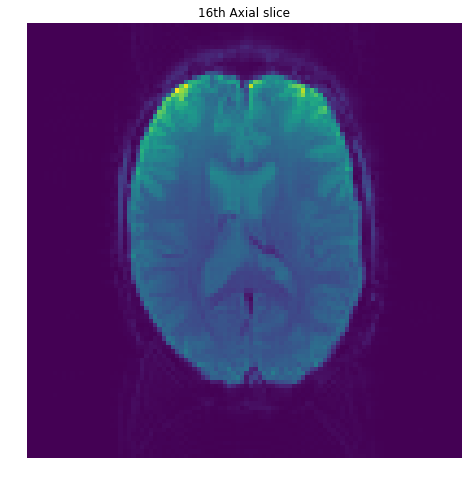

In [341]:
plt.figure(figsize=(8, 8))
plt.imshow(slice_axial_15)
plt.title("16th Axial slice")
_ = plt.axis('off')

Now let's slice the 51st coronal slice. We'll get all the values in the `(X,Z)` axes, and specify the `(Y)` axis to be `50`. Then we'll plot it:

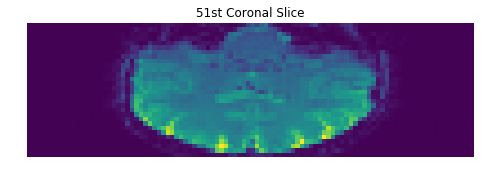

In [342]:
slice_coronal_50 = data_mean[:, 50, :]

plt.figure(figsize=(8, 8))
plt.imshow(slice_coronal_50)
plt.title('51st Coronal Slice')
_ = plt.axis('off')

Looks like this coronal slice is upside down! To make the image right side up we'll use slicing to reverse the  axis that is flipped. In this case it is the first axis (rows) of the 2-D slice. To flip, or invert, the data along an axis of an array, we can use `::-1` like we learned two weeks ago. This is specifing a `step` of `-1`, which causes the values to be retreived in the reverse order. 

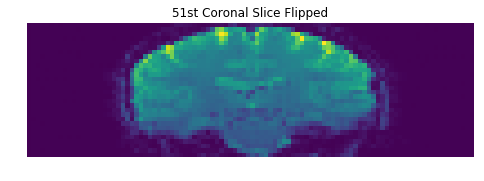

In [343]:
slice_coronal_50_flipped = slice_coronal_50[::-1,:]

plt.figure(figsize=(8, 8))
plt.imshow(slice_coronal_50_flipped)
plt.title('51st Coronal Slice Flipped')
_ = plt.axis('off')

The image is now right side up, but it still looks distorted. That is because we have not set the correct aspect ratio, since the coronal voxels are not square, but rectangular. First we'll calculate the correct aspect ratio using the voxel size as we learned last week, then use that aspect ratio in the call to `plt.imshow` as the `aspect`.

In [344]:
voxel_shape = img.header.get_zooms()
voxel_shape

(2.24, 2.24, 4.1300001, 1.0)

In [345]:
coronal_aspect = voxel_shape[2] / voxel_shape[0]
coronal_aspect

1.84375

(-0.5, 99.5, 29.5, -0.5)

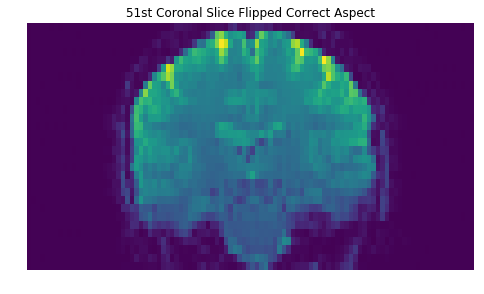

In [346]:
plt.figure(figsize=(8, 8))
plt.imshow(slice_coronal_50_flipped, aspect=coronal_aspect)
plt.title("51st Coronal Slice Flipped Correct Aspect")
plt.axis('off')

#### Breakout Session

1\. Extract the 51st slice in the `(Y,Z)` plane and plot it using `plt.imshow`. What type of slice is this?

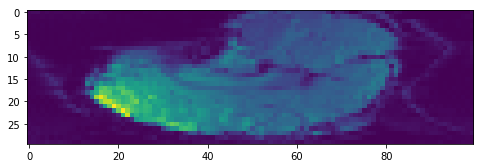

In [348]:
### STUDENT ANSWER
slice_yz = data_mean[:,:,50]
plt.figure(figsize=(8,8))
_ = plt.imshow(slice_yz)

2\. Now that you know what type of slice it is, make the plot look pretty, just as we did for the coronal slice. Do any flipping or aspect ratio adjustment necessary, and give it a plot title.

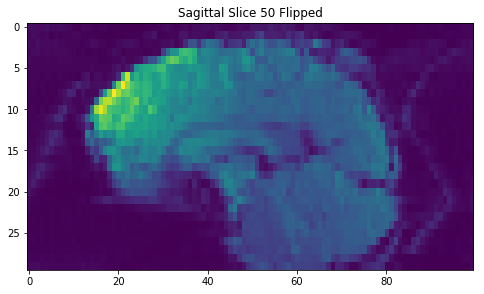

In [350]:
### STUDENT ANSWER
plt.figure(figsize=(8,8))
sagittal_aspect = coronal_aspect
slice_yz_flip = slice_yz[::-1,:]
plt.imshow(slice_yz_flip, aspect=sagittal_aspect)
plt.title('Sagittal Slice 50 Flipped')

<a id="Masking"></a>
## Masking

The third and final technique for subsetting data from an array is called **masking**. Masking involves creating a binary array (of `True`/`False` values) that is the same size as your data array, where the `True` values indicate the indices to keep, and the `False` values indicate the indices to disregard.

### Masking Basics

Let's cover some basics of how masking works on simple 1-D arrays before moving to more complex fMRI brain 4-D arrays. First we'll create a "data" array containing the values from 10-19. Then we'll create a **mask** from 10 binary values.

In [351]:
array1D = np.arange(10,20)
mask = np.array([True, True, True, False, False, True, True, False, False, False])
print(array1D)
print(mask)

[10 11 12 13 14 15 16 17 18 19]
[ True  True  True False False  True  True False False False]


Once you have a mask, and array of the same size that you want to apply the mask to, you "mask" the data array in a similar way to indexing, by putting the mask between brackets:

In [352]:
array1D_masked = array1D[mask]
print(array1D_masked)

[10 11 12 15 16]


We see that there are 5 `True` values and 5 `False` values in the mask. The `True` values lie at indices `[0,1,2,5,6]` in the `mask`. Applying the `mask` to `array1D` returns the values from `array1D` at these same indices. To prove it, let's compare the results of masking here with those of indexing:

In [353]:
print(array1D[[0,1,2,5,6]])
print(array1D[mask])

[10 11 12 15 16]
[10 11 12 15 16]


We know that indexing returns a copy of the original data, but what about masking? Let's have a look:

In [355]:
array1D_masked[0] = 100
print(array1D_masked)
print(array1D)

[100  11  12  15  16]
[10 11 12 13 14 15 16 17 18 19]


Applying a mask does copy the data just as indexing does! We can tell because after modifying the first element in the masked array, the original array has remained unchanged.

<a id="Logical_Operators"></a>
#### Binary operators to create masks

Writing out `True` and `False` becomes tedious very quickly when dealing with arrays of any decent size. 

Additionally, we often want to create a mask based on some analysis of the values in the array itself. 

For both of these reasons **masking** is usually done by creating binary arrays using a logical operation on the original array itself. Here's a list of some useful logical operators:
* `>`, `>=`: Greater than and greater than or equal to
* `<`, `<=`: Less than and less than or equal to
* `==`: Equal to
* `!=`: Not equal to

For example, let's imagine we want to get all of those values from the original array that are greater than or equal to 13:

In [356]:
array1D

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [357]:
logical_mask_greater_equal_13 = array1D >= 13
logical_mask_greater_equal_13

array([False, False, False,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [358]:
array1D[logical_mask_greater_equal_13]

array([13, 14, 15, 16, 17, 18, 19])

We can also use these logical operations inside the brackets for a more succint way of masking. Let's find all the values in the data that are greater than or equal to 13 as we just did.

In [359]:
array1D[array1D >= 13]

array([13, 14, 15, 16, 17, 18, 19])

As another example, we could create a mask containing all those values below 18:

In [360]:
logical_mask_less_than_18 = array1D < 18
logical_mask_less_than_18

array([ True,  True,  True,  True,  True,  True,  True,  True, False, False], dtype=bool)

In [361]:
array1D[logical_mask_less_than_18]

array([10, 11, 12, 13, 14, 15, 16, 17])

Sometimes we want to create a mask that involves more than one logical condition. For those cases, we can use binary operations on multiple binary masks. There are 3 binary operators that we'll focus on here, namely:
1. **logical AND** (`&`): Both values must be true
2. **logical OR** (`|`): Either of the values must be true.
3. **logical compliment**, or simply **not**, (`~`): The value must be false.

For example, if we only want to select what lies in two masks at the same time we would use the **logical AND** operator (`&`):

In [362]:
mask_logical_and = logical_mask_greater_equal_13 & logical_mask_less_than_18

print(logical_mask_greater_equal_13)
print(logical_mask_less_than_18)
print(mask_logical_and)

[False False False  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True False False]
[False False False  True  True  True  True  True False False]


In [363]:
array1D[mask_logical_and]

array([13, 14, 15, 16, 17])

We could also select what is in either one of the masks using the  **logical OR** operator (`|`). Here we'll use the logical operator within the subsetting brackets. 

What should this give us?

In [364]:
array1D[logical_mask_greater_equal_13 | logical_mask_less_than_18]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

All of the values! That's because every value is greater than or equal to 13 or less than 18.

We could also be interested in the logical complement of a mask, which will just flip all the `True` values to `False`, and vice versa. In other words, we would like to include only elements that are **not** in the mask:

In [365]:
not_greater_equal_13 = ~logical_mask_greater_equal_13
print(logical_mask_greater_equal_13)
print(not_greater_equal_13)

[False False False  True  True  True  True  True  True  True]
[ True  True  True False False False False False False False]


In [366]:
array1D[not_greater_equal_13]

array([10, 11, 12])

Instead of the binary operator symbols `&, ~, |`, which are sometimes hard to memorize, you can also use `np.logical_and`, `np.logical_or`, and `np.logical_not`. Let's use `np.logical_not` to do the same masking as in the last cell.

In [367]:
array1D[np.logical_not(logical_mask_greater_equal_13)]

array([10, 11, 12])

#### Breakout Session

1\. Create a 1-D array of 20 randome numbers and call it `random_1D_break`.

In [369]:
### STUDENT ANSWER
random_1D_break = np.random.randn(20)
random_1D_break

array([-1.19077695, -1.34602875, -0.15955153, -1.00262567,  0.15281331,
        1.63163978, -1.28159655, -0.6439003 , -3.88759461,  1.95052679,
       -3.00882687,  0.35045861,  0.49891209,  0.42455962,  1.73964809,
       -1.03421918, -1.07281712, -0.20437488,  1.80435433,  0.08120187])

2\. Calculate the mean of this array and call it `random_1D_break_mean`.

In [370]:
### STUDENT ANSWER
random_1D_break_mean = np.mean(random_1D_break)
random_1D_break_mean

-0.30990989673889047

3\. Create a mask that selects the elements in `random_1D_break` that are above the mean and call it `random_1D_break_mask`.

In [371]:
### STUDENT ANSWER
random_1D_break_mask = random_1D_break > random_1D_break_mean
random_1D_break_mask

array([False, False,  True, False,  True,  True, False, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True], dtype=bool)

4\. Apply the mask you just created to `random_1D_break`.

In [372]:
### STUDENT ANSWER
random_1D_break[random_1D_break_mask]

array([-0.15955153,  0.15281331,  1.63163978,  1.95052679,  0.35045861,
        0.49891209,  0.42455962,  1.73964809, -0.20437488,  1.80435433,
        0.08120187])

<a id="Masking_Dimensionality"></a>
### Masking reduces dimensionality

Masking allows for the selection of arbitrary indices, just as indexing does. Because the resulting array elements selected using masking aren't entire rows or columns, they aren't in a shape that fits nicely into multiple dimensions. So there is no other choice but to always return the data in the masked axes in a single dimension.

For example, if we used a 3-D mask on a 3-D array, the array returned would be a 1-D array. let's see that now:

In [373]:
arr3D_stacked0

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.]],

       [[ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.]]])

In [374]:
arr3D_stacked0.shape

(3, 4, 5)

Create a mask that selects all the values that are greater than the mean across the entire 3-D array.

In [375]:
arr3D_mean_mask = arr3D_stacked0 < arr3D_stacked0.mean()
arr3D_mean_mask.shape

(3, 4, 5)

Apply the mask we just created.

In [376]:
arr3D_masked = arr3D_stacked0[arr3D_mean_mask]
arr3D_masked.shape

(20,)

Using this 3-D mask returned a 1-D array containing the 20 values (from the original 60) that are above the mean.

But if we used a 2-D mask on two of the dimensions of the 3-D array, then masking would return all of the indices of the axis not masked, plus the values of the elements masked in the 2-D array. 

First, create a 2-D array of `False` values with the same shape as the last 2 axes of the 3-D array `arr3D_stacked0`. Since `False` equals `0`, we can create this array using `np.zeros` and specifying the `dtype` as `np.bool`.

In [378]:
int(True)

1

In [379]:
int(False)

0

In [380]:
arr2D_mask = np.zeros(arr2D_1.shape, dtype=np.bool)
arr2D_mask

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]], dtype=bool)

Now set the values in the first row of the 2-D mask to True.

In [395]:
arr2D_mask[0,:] = True
arr2D_mask[1,0] = True
arr2D_mask

array([[ True,  True,  True,  True,  True],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]], dtype=bool)

And apply this 2-D mask to the last two axes of the 3-D array.

In [396]:
arr3D_2Dmask = arr3D_stacked0[:,arr2D_mask]
arr3D_2Dmask

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.]])

In [387]:
arr3D_stacked0

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.]],

       [[ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.,  3.]]])

This results in a 2-D array that has 3 rows, the same as the number of elements in the first axis of the 3-D array, and 5 columns, which is the number of `True` values in the 2-D mask.

We can extend this concept of using a mask on a subset of axes to 4-D arrays. Let's create a 4-D array by stacking two 3-D arrays, and then apply a 3-D mask to the last 3 axes of that 4-D array.

In [391]:
arr4D = np.stack((arr3D_stacked0,arr3D_stacked0), axis=0)
arr4D.shape

(2, 3, 4, 5)

Now apply the mean 3-D mask we created above to last 3 dimensions of this stacked 4-D array. What will the shape of the returned array be?

In [393]:
arr3D_mean_mask

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]]], dtype=bool)

In [392]:
arr4D_masked = arr4D[:,arr3D_mean_mask]
arr4D_masked.shape

(2, 20)

In [399]:
arr4D_masked = arr4D[:,:,arr2D_mask]
arr4D_masked.shape

(2, 3, 6)

It is a 2-D array, where the first axis has the same number of indices as the first axis of the 4-D array. The second axis contains 30 values, which is the same number of `True` values in the mask.

#### Breakout Session

1\. Create a 3-D mask for `arr3D_stacked0` that selects all the elements equal to it's max value and call it `arr3D_stacked_mask`. 

In [400]:
### STUDENT ANSWER
arr3D_stacked_mask = arr3D_stacked0.max() == arr3D_stacked0
arr3D_stacked_mask

array([[[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]], dtype=bool)

2\. Apply that mask to `arr3D_stacked0`. How many dimensions does the data have?

In [401]:
### STUDENT ANSWER
arr3D_stacked0[arr3D_stacked_mask]

array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.])

### Differences between indexing and masking

Both indexing and masking are similar ways to subset data. Several key differences exist however. One way to think about the two techniques is that indexing can do almost everything that masking can do, but more. Here are a few of the major differences:

1. Masks can be created using logical operators, while indexing cannot (although there is a way to turn a mask into indices, using `np.where`)

2. Masking can't return the same element multiple times, and indexing can.

3. Masking can't return values in an arbitrary order of indices like indexing can.

4. Indices must be specified per axis, but masks but specified across multiple axes. For example, we specified a 3-D mask for the last 3 spatial axes of a 4-D **scan** array. To use indexing for that we would need to specify three 1-D arrays of indices.

## Masking 4-D fMRI data arrays (Scans)

Masking is used on fMRI data primarily to exclude unwanted voxels, i.e. we generally mask in all 3 spatial dimensions to get just a subset of voxels we're interested in.

Now that we have some masking basics down, we will show you how to use masking to extract: 
* Just the data in the brain 
* Just the data in the cerebral cortex 

<a id="Brain_Masks"></a>
### Brain masks using thresholding

To figure out how we can determine what is brain and what is not, let's plot a histogram of values for all the data. This will show that our data has a large number of voxels with values close to zero, which we just happen to know are from outside the brain where there is nothing but air to create a very low signal value.

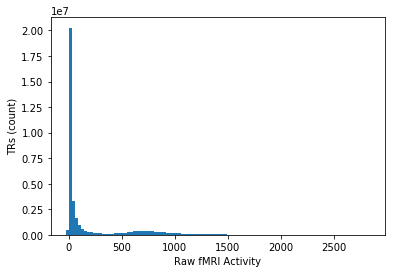

In [402]:
# create a histogram with 40 bins and label the x and y axes
_ = plt.hist(data.flatten(), 100)
plt.xlabel('Raw fMRI Activity')
plt.ylabel('TRs (count)')

So: how can we extract the data that is only from the region of the scan that contains the brain/head? One simple way to find data that is in or near the brain is to threshold the data to find only the voxels where the signal is greater than that low signal value. We'll use masking to do this.

The first step is to use the histogram to decide on a threshold value. Looking at this histogram it looks like there are two "bumps" in the distribution. The first one is close to zero, and very large. The second one starts just before `500` and is much smaller. It is hard to tell exactly where the threshold should be, however. We'd like to zoom in on the area around the start of that second bump, say 300-600 to get a more precise idea of where the threshold should be. We can do that using `range=(300,600)` in the `plt.hist` call.

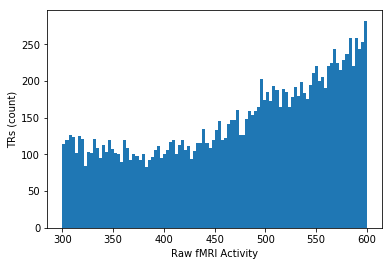

In [403]:
# create a histogram with 40 bins and label the x and y axes
_ = plt.hist(data_mean.flatten(), bins=100, range=(300,600))
plt.xlabel('Raw fMRI Activity')
plt.ylabel('TRs (count)')

There's no hard rule to use in setting the threshold here, but it looks like the number of voxels above `400` seems to increase again, indicating the start of the brain, and the voxels below that value are likely just be noise from outside the brain voxels. So let's use `400` as our threshold, and store that in a name.

In [404]:
threshold = 400

The second step is to determine which volume to threshold. We could use the first, middle or last volume from the 4-D **scan** array, or we could use the mean volume (`data_mean`). That's a nice option because any one of those volumes might have a large noise fluctuation that puts it over the threshold. The average is resistant to fluctations.

So let's create a brain mask by creating a new 3-D array the same size as the mean volume, that has a `True` value for every voxel whose mean activity is above the threshold we decided just now.

In [406]:
mask_brain_voxels = data_mean > threshold

What are some of the properties of the mask we have just created?

In [407]:
print('dtype of the brain mask: ', mask_brain_voxels.dtype)
print('Sum of of the brain mask: ', mask_brain_voxels.sum())
print('Mean of of the brain mask: ', mask_brain_voxels.mean())
print('Shape of the brain mask: ', mask_brain_voxels.shape)

dtype of the brain mask:  bool
Sum of of the brain mask:  58873
Mean of of the brain mask:  0.196243333333
Shape of the brain mask:  (30, 100, 100)


To visualize what this mask looks like, we can crete an interactive plot that draws one axial slice at a time, but allows us to easily change the slice plotted using a slider bar. 

This is done using the interact function along with a function that plots a single axial slice of the 3-D mask. Functions have been covered in the data 8 lecture, but not yet here, so if you don't understand what's happening here, don't worry! We'll cover functions next week.

In [408]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
def plotMask(i):
    plt.figure(figsize=(9,9))
    plt.imshow(mask_brain_voxels[i,:,:], cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
    
num_axial_slices = mask_brain_voxels.shape[0]
_ = interact(plotMask, i=widgets.IntSlider(min=0,max=num_axial_slices-1,step=1,value=num_axial_slices/2))

interactive(children=(IntSlider(value=15, description='i', max=29), Output()), _dom_classes=('widget-interact',))

And let's see if that looks right by doing the same thing for the data itself.

In [409]:
def plotData(i):
    plt.figure(figsize=(9,9))
    plt.imshow(data_mean[i,:,:], cmap="gray", vmin=0, vmax=2500)
    plt.axis('off')
    
_ = interact(plotData, i=widgets.IntSlider(min=0,max=num_axial_slices-1,step=1,value=num_axial_slices/2))

interactive(children=(IntSlider(value=15, description='i', max=29), Output()), _dom_classes=('widget-interact',))

That looks pretty good!

Now let's use the mask to get a collection of voxel time series that contains only the voxels in the brain.

What the shape should the array be?

In [410]:
data_brain_voxels = data[:,mask_brain_voxels]
data_brain_voxels.shape

(120, 58873)

Where did the `58858` number come from? 
We know that a collection of voxel time series is 2-D array where the first axis is time and the second axis is voxels. Could `58858` be the number of voxels in the brain mask?

To determine if that's reasonable, let's found out how many voxels are in each 3-D volume? 

To find that out we simply mulitple the number of elements in each of the three space dimensions. We can use `np.prod` on the `shape` of the brain mask to find that out:

In [411]:
np.prod(mask_brain_voxels.shape)

300000

So the number of voxels in the collection of voxel time series is smaller than the total number of voxels in the volume, which is good.

Now let's see how many values the mask actually selects:

In [412]:
mask_brain_voxels.sum()

58873

Since a binary mask consists of `True` and `False` values, and `True == 1` and `False == 0`, then we can take the sum across all axes of the mask to determine the number of values the mask will return! 

In this case, since the mask is in the 3 axes of space, applying it to the 4-D scan array in the space axes gives us a 2-D collection of voxel time series, where there are `58858` voxels, which is what we saw above.

### Breakout session
1. Discuss what each of the proprties of the mask printed out above indicate about the `mask_brain_voxels` array.
2. What would happen if you used a threshold for the mask that was much higher than `500`? Or much lower? Try changing the threshold value above and replotting the interactive plot to get an idea of how the threshold affects the mask.

In [ ]:
### STUDENT ANSWER

<a id="Cortical_Masks"></a>
### Cortical Masking with Pycortex

As we learned in the first lecture, the brain consists of several types of tissues and has many different structures. Let's assume for now that we're only interested in looking at, and analyzing, the data from the grey-matter of the cortex. It will save us a lot of processing time to restrict all the analyses we're doing to just those voxels that we're interested in. To do that we need to create a mask of just the cortical grey-matter voxels. 

That is a difficult thing to determine, but luckily there is software called **Freesurfer** that does determines the grey-matter voxels for us. It first **segments** the brain image into **grey-matter**, **white-matter**, and **CSF**, and then into **cortex** and **sub-cortical** regions.

In the below image on the left, you can see grey-matter in grey and white-matter in white. The top image on the right shows the grey-matter voxels in the cortex colored in yellow. The bottom image on the right shows a cortical surface created from those grey-matter cortical voxels.

<div>
<br/>
<img src="figures/MPRAGE.png" align='left' style="height: 300px;">
<img src="figures/MPRAGE_wcortex.png" align='Right' style="height: 175px;">
<img src="figures/cortex_3views.png" align='Right' style="height: 175px;">
</div>

<a id="Pycortex"></a>
We will use a python module called **`pycortex`** to get a cortical mask saved for the example subject we've been working with. This module was developed here at UC Berkeley in the Gallant lab, mostly by James Gao, with help from Alex Huth, Mark Lescroart, and other lab members. Its primary purpose is to visualize 3-D fMRI volumes, but it has many other useful functions. The code for **pycortex** is freely available online [here](https://github.com/gallantlab/pycortex), and a paper summarizing the code can be found [here](http://journal.frontiersin.org/article/10.3389/fninf.2015.00023/full) if you are interested. 

Let's import pycortex now:

In [413]:
import cortex

Now we'll use `cortex.db.get_mask` to get a cortical mask of the data that was created when Freesurfer segmented the brain. We need to specify 2 things, both of which you just need to know, so we'll always tell you what to use. 

`subject` indicates the subject name that is used to lookup the mask in a database.
`transform` indicates the name of a set of numbers used to locate the mask in 3-D space. We'll learn more about this in the next lecture.

Finally, we just need to specify that we want a `type='cortical'` mask: 

In [414]:
subject = 's01'
transform = 'catloc'
mask_cortex = cortex.db.get_mask(subject, transform, type='cortical')
mask_cortex.shape

(30, 100, 100)

Let's look at some descriptive statistics of the mask to give us a better idea of what's going on.

In [415]:
print(mask_cortex.dtype)
print(mask_cortex.shape)
print(mask_cortex.sum())
print(mask_cortex.mean())

bool
(30, 100, 100)
38543
0.128476666667


And we can make another interactive plot to visualize it:

In [416]:
def plotCortex(i):
    plt.figure(figsize=(9,9))
    plt.imshow(mask_cortex[i,:,:], cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
    
_ = interact(plotCortex, i=widgets.IntSlider(min=0,max=num_axial_slices-1,step=1,value=num_axial_slices/2))

interactive(children=(IntSlider(value=15, description='i', max=29), Output()), _dom_classes=('widget-interact',))

### Breakout Session

1\. Use the `mask_cortex` mask to get a collection of voxel time series containing only the cortical voxels. Print it's shape.

In [ ]:
### STUDENT ANSWER

2\. Find the mean, min and max values for each of the cortical voxels. Print out the shape of the results.

In [ ]:
### STUDENT ANSWER

3\. Now find the mean, min and max across all the cortical voxels. Print out the actual values.

In [ ]:
### STUDENT ANSWER

# 3D Array (Volume) Visualization 

There are two primary ways we'll learn to plot 3-D volumes:
1. Multiple slice images
2. Cortical surface maps

Before we do, we need to learn how to put multiple plots into a single figure.

<a id="Subplot"></a>
## Multiple plots in a figure: `plt.subplot`

It's often very useful to put multiple plots together into a single figure. For example, we've learned that a voxel time series can be plotted both as a line plot and a histogram. Putting them side by side allows you to visualize the data from two different perspectives. To do this, we can use `plt.subplot`. 

Generally, `plt.subplot` takes 3 parameters: `(numRows, numColumns, currentSubPlot)`. It splits a figure into rectangular plots. The plots are organized into a grid with the number of rows spsecified by `numRows` and columns by `numCols`. Thus, the total number of plots is the product of `numRows` * `numCols`. `currentSubPlot` tells `plt.subplot` which of these rectangles the next plot will be draw into to. **NOTE: It starts from 1, not 0!** It also goes from 0 to numRows * numCols, filling the columns of the first row, then the columns of the second row, etc. through all the rows.

Let's start with an example plotting 2 plots (a line plot and histogram of `timeseries`) into a figure with a single row with 2 columns:

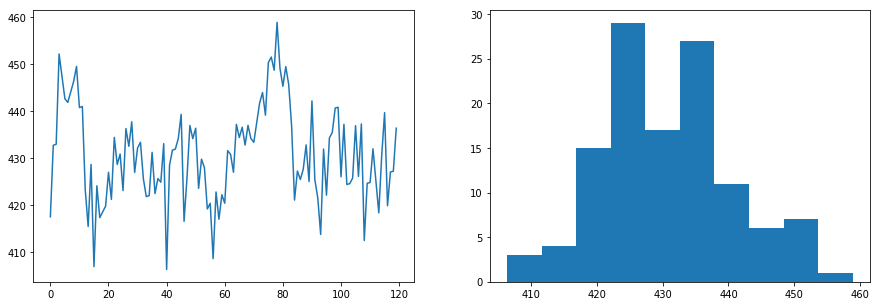

In [417]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(timeseries)

plt.subplot(1,2,2)
_ = plt.hist(timeseries)

**NOTE:** The first two parameters to `plt.subplot` remained the same here, only the 3rd parameter changed, in order to tell `matplotlib` which plot to draw into. Although you can change the number of rows and columns from subplot to subplot, it is generally a bad idea, as it results in subplots of different sizes.

#### Breakout Session
1. Create a line plot and histogram for `timeseries2`, but this time put them into 2 rows in the same column. Also, add a title and y and x axis labels.

In [ ]:
### STUDENT ANSWER

## Plotting all 3 slices surounding a single voxel

Any given voxel will have 3 slices (an axial, coronal and sagittal) intersecting through it. Let's use `plt.subplot` to display those 3 slices for a single voxel to give us an idea of what's going on around that point.

Since the coronal and sagittal slices are the same height, it will make sense to plot them together in a single row, and then plot the axial slice in second row by itself. We'll also have to flip the coronal and sagittal slices by slicing the `Z` axis using `::-1`, and use the aspect ratio values we calculated above to remove the distortion.

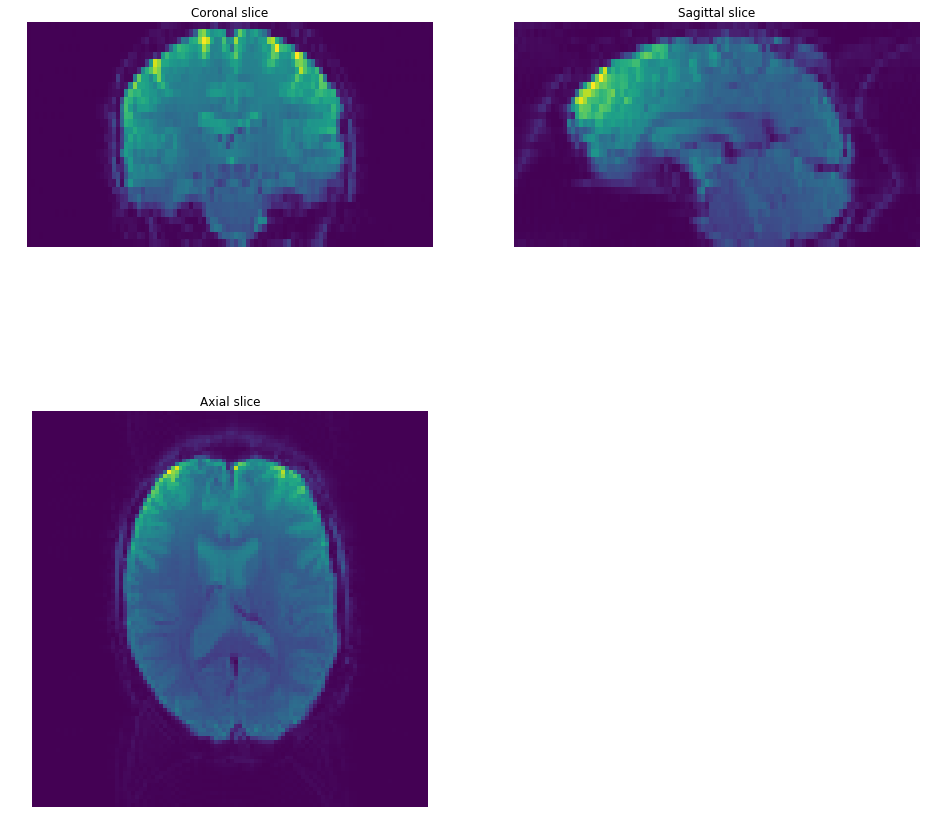

In [418]:
z = 15
y = 50
x = 50

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(data_mean[::-1, y, :], aspect=coronal_aspect)
plt.title("Coronal slice")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(data_mean[::-1, :, x], aspect=sagittal_aspect)
plt.title("Sagittal slice")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(data_mean[z, :, :], aspect=1)
plt.title("Axial slice")

_ = plt.axis('off')

To mark the voxel that is common to all 3 of these plots we can draw a horizontal and vertical line in each plot that interesect at the voxel. To do this we'll use `plt.plot` and a bit of math to figure out where to draw the lines. 

First, we need to figure out which voxel dimension `(Z,Y,X)` are stored as the rows, and which as the columns for each of the 3 plots. Then, to draw the horizontal line, we find the voxel coordinate stored in rows, and draw a line from the minimum to the maximum column value, at that row value. And vice versa for the vertical line. Let's have a look:

In [419]:
numZ = data_mean.shape[0]
numY = data_mean.shape[1]
numX = data_mean.shape[2]

coronal_horiz_rows = [z,z]
coronal_horiz_cols = [0,numX]
coronal_vert_rows = [0,numZ]
coronal_vert_cols = [x,x]

sagittal_horiz_rows = [z,z]
sagittal_horiz_cols = [0,numY]
sagittal_vert_rows = [0,numZ]
sagittal_vert_cols = [y,y]

axial_horiz_rows = [y,y]
axial_horiz_cols = [0,numX]
axial_vert_rows = [0,numY]
axial_vert_cols = [x,x]

Now let's use these values to plot lines onto the 3 slice plot from above.

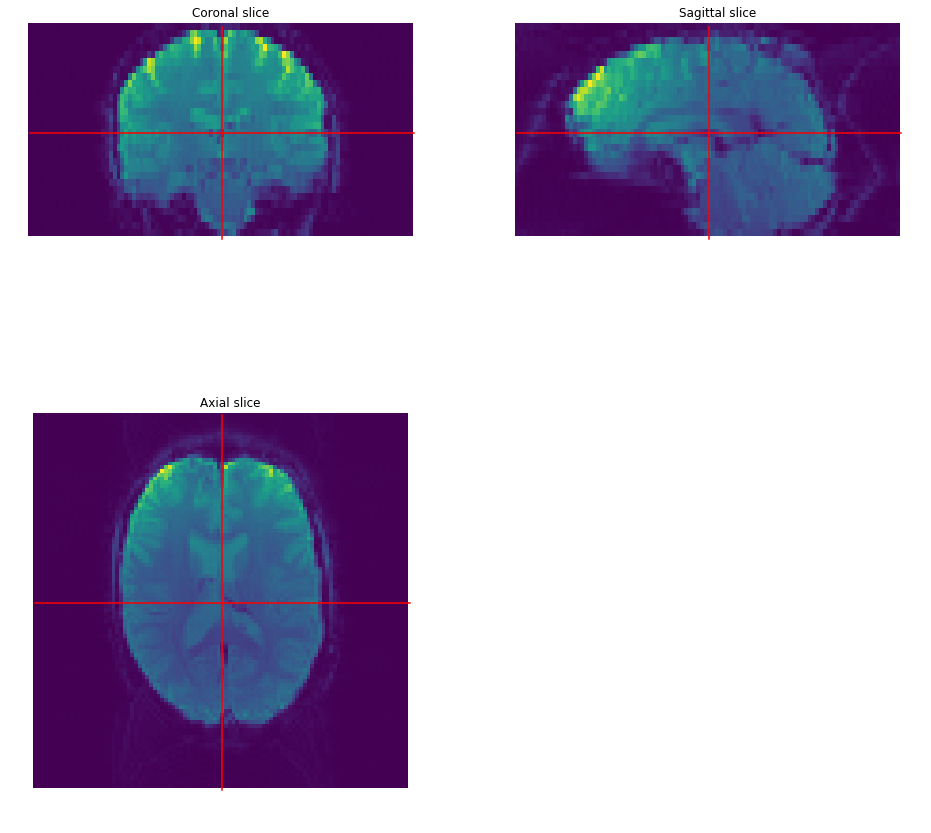

In [420]:
z = 15
y = 50
x = 50

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(data_mean[::-1, y, :], aspect=coronal_aspect)
plt.plot(coronal_horiz_cols, coronal_horiz_rows, 'r')
plt.plot(coronal_vert_cols, coronal_vert_rows, 'r')
plt.title("Coronal slice")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(data_mean[::-1, :, x], aspect=sagittal_aspect)
plt.plot(sagittal_horiz_cols, sagittal_horiz_rows, 'r')
plt.plot(sagittal_vert_cols, sagittal_vert_rows, 'r')
plt.title("Sagittal slice")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(data_mean[z, :, :], aspect=1)
plt.plot(axial_horiz_cols, axial_horiz_rows, 'r')
plt.plot(axial_vert_cols, axial_vert_rows, 'r')
plt.title("Axial slice")
_ = plt.axis('off')

#### Breakout session
1. Use `plt.subplot` to draw images for the axial, coronal and sagittal slices at point (6,57,37)

In [ ]:
### STUDENT ANSWER

<a id="For_Loops"></a>
## Iterations: `for` loops

You've learned about `for` loops in the data8 lecture already, so we'll just do a quick review before using them today.

`for` loops allow you to run the same line of code over and over again, while updating the value of a name each time that code is run. The syntax looks like this:

`for iterator_name in sequence_of_values:`
`     code`

where:
* **iterator_name** is a name that will be updated with a new value on every **iteration** or loop
* **sequence_of_values** is some type of container (list, tuple or array) that contains the values you want the **iterator_name** to take on each **iteration** of the loop.
* **code** Any piece of code you want to run multiple times. Usually it will use the **iterator_name**.

First let's imagine a scenario where we'd want to use a for loop. Let's say we have a collection of values, and we want to print them each out on a separate line. Without a for loop it would look like this:

In [421]:
random_values = np.random.rand(5)

print(random_values[0])
print(random_values[1])
print(random_values[2])
print(random_values[3])
print(random_values[4])

0.99101398842
0.392321227024
0.0652434557792
0.970997727883
0.75889413536


But using a `for` loop, we can write it more succintly: 

In [422]:
for i in np.arange(random_values.shape[0]):
    print(random_values[i])

0.99101398842
0.392321227024
0.0652434557792
0.970997727883
0.75889413536


So what did we do? Let's pull it apart:

First, qe called the **iterator_name** `i`. 

Second, for the **sequance_of_values** we created a range that starts from zero and goes to the length of `random_values`. Let's prove that to ourselves here:

In [423]:
random_values.shape[0]

5

In [424]:
np.arange(random_values.shape[0])

array([0, 1, 2, 3, 4])

Finally, the **code** in the loop simply extracts the the value from `random_values` with index `i`, and prints it.

Here's a second example that uses a loop to create a line plot for each of the voxel time series in a collection:

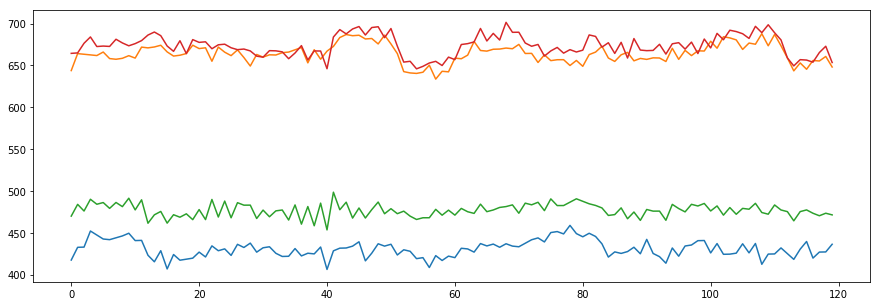

In [425]:
plt.figure(figsize=(15,5))
for i in np.arange(timeseries_multi.shape[1]):
    plt.plot(timeseries_multi[:,i])

#### Breakout Session

1\. Create a for loop that iterates over the voxel time series in `timeseries_multi` and plots a histogram of each voxel time series on a different subplot. There are 4 voxel time series, so make 2 rows and 2 columns of subplots.

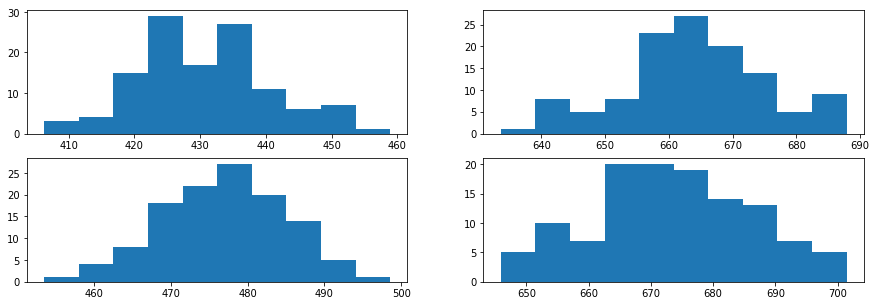

In [426]:
### STUDENT ANSWER
plt.figure(figsize=(15,5))
for i in np.arange(timeseries_multi.shape[1]):
    plt.subplot(2,2,i+1)
    plt.hist(timeseries_multi[:,i])

<a id="Multiple_Images"></a>
## Visualization of multiple slice images
Above we plotted all 3 slices of a single voxel from a 3-D volume array. Let us now be exhaustive and plot all the slices of a 3-D volume array. Let's plot all the axial slices of our mean volume.

The shape of the volume is `(30, 100, 100)`, meaning there are 30 axial slices, which we can arrange in a panel of images with 5 rows x 6 columns.

In order to automatize this, we can use a for loop to loop through the slice indices.

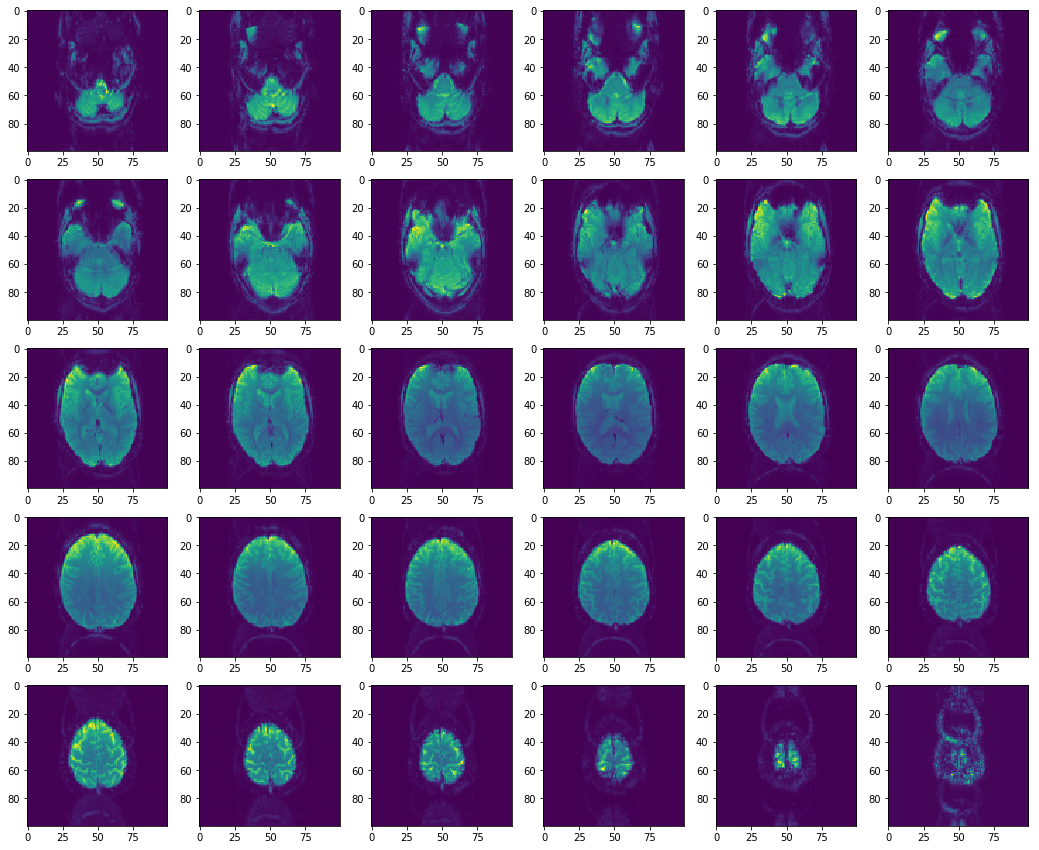

In [427]:
plt.figure(figsize=(18, 15))
for i in np.arange(data_mean.shape[0]):
    plt.subplot(5, 6, i + 1)
    plt.imshow(data_mean[i, :, :])

Notice that we added a 1 to the last parameter of `plt.subplot` above. Why is that? 

It is because python starts counting from zero, and `plt.subplot` starts counting from one.

To improve this plot, we can use slicing to crop away some of the unoccupied parts of these images and use `plt.axis('off')` to remove the tickmarks. 

We would also like to add a title to this plot. We've learned `plt.title` prints a title at the top of a plot, but when we use `plt.subplot` that will print a title above each of the subplots. To print a title at the top of the entire figure, we use `plt.suptitle` and `plt.tightplot` in order to keep the images close together.

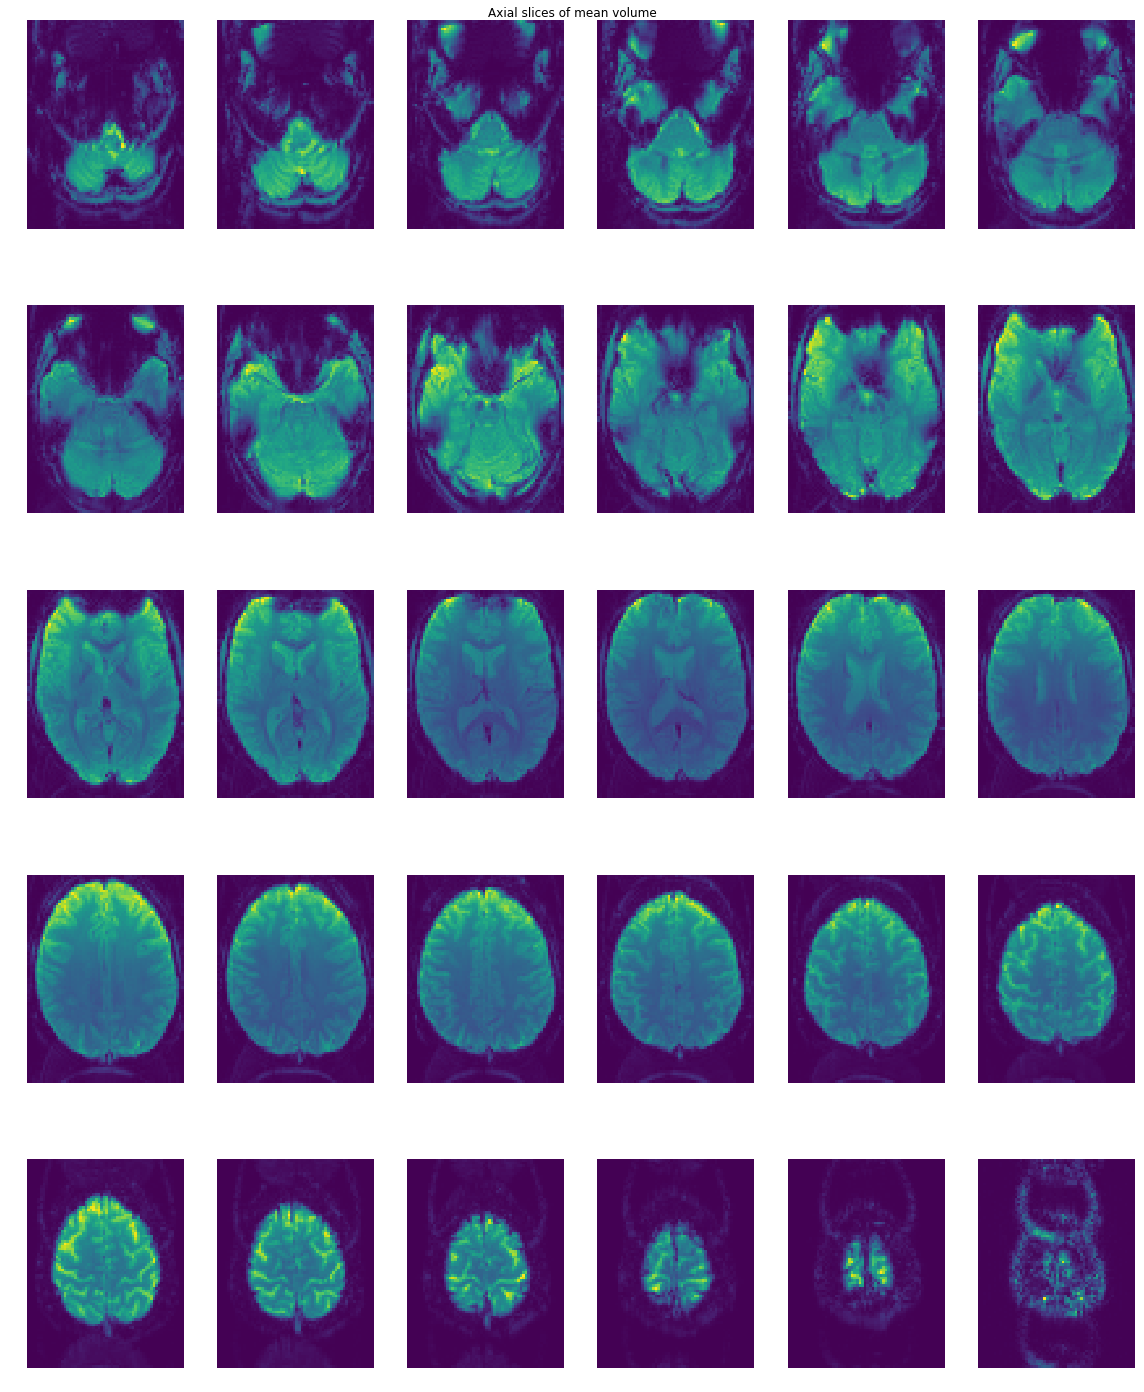

In [428]:
plt.figure(figsize=(16, 20))
for i in np.arange(data_mean.shape[0]):
    plt.subplot(5, 6, i + 1)
    plt.imshow(data_mean[i, 10:-10, 20:-20])
    plt.axis('off')
plt.suptitle("Axial slices of mean volume")
plt.tight_layout()

We could use the same code to plot the cortical mask we created today. Let's see that:

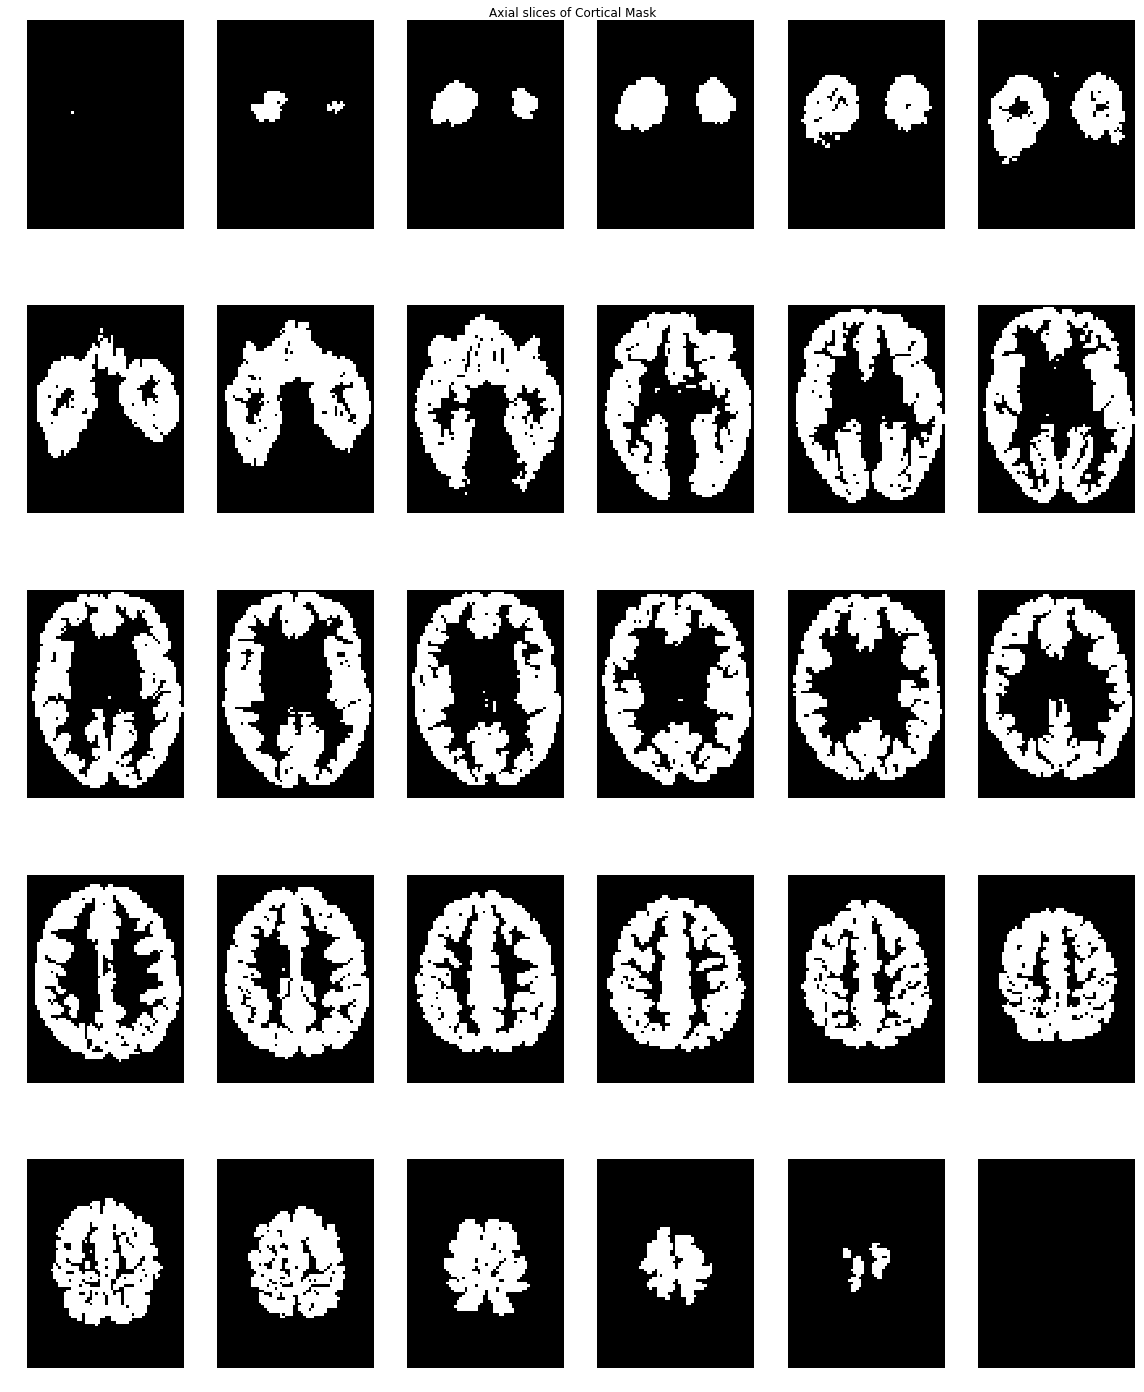

In [429]:
plt.figure(figsize=(16, 20))
for i in np.arange(data_mean.shape[0]):
    plt.subplot(5, 6, i + 1)
    plt.imshow(mask_cortex[i, 10:-10, 20:-20], cmap='gray')
    plt.axis('off')
plt.suptitle("Axial slices of Cortical Mask")
plt.tight_layout()

#### Breakout Session

1\. Plot all the axial slices of the last volume, which we retreived earlier into `volume_last`. Remove the axis labels and give the entire figure a title.

In [ ]:
### STUDENT ANSWER

## Visualizing 3-D Arrays (Volumes) on a Flatmap

While visualizing a volume as multiple images is useful if you want to see every single voxel, many neuroscientists are interested only in the cortex. When that is the case, there are several reasons why using cortical surface maps, or flatmaps, are a better alternative to multiple images:
* Cortical surface maps provide a way to examine all cortical fMRI data at once, with the anatomical location of the functional data made clear. 
* Since flatmaps are segmented as a prerequisite, you know that all the activity you are viewing is grey-matter, not white matter or CSF. Because the BOLD signal is actually measuring the properties of blood, it is possible to get what looks like significant activity that is actually an artifact of a blood vessel in the white matter, which is misleading.
* Voxels that are close together in 3D space may not be close on the cortical surface due to the folding gyri and sulci of the cortex. Since functionality is generally localized proximally on the cortical surface, we often see ROIs of a functional region look like a ball in 3D space (or even worse), but make a lot of sense on a flat map.

We will again use **`pycortex`** to visualize 3-D volume arrays on cortical surface maps. To map the functional data onto the cortex, pycortex requires the same two pieces of information required when retrieving the cortical mask, namely the **subject** and **transformation** names.

### `Volume` Pycortex Data-Structure

The basic data structure used by pycortex to store fMRI data is the `Volume`. It contains a numpy array with the data to be displayed, as well as information about the subject and transformation to use. Let's create one using the mean volume as the data, for use in both static and dynamic 3D plotting.

In [430]:
subject = 's01' 
transform = 'catloc' 
data_volume = cortex.Volume(data_mean, subject, transform) 

<a id="Dynamic_Cortical_Surface"></a>
### Dynamic Cortical Surface Maps

Dynamic cortical surface maps create an interactive viewer in your web browser that displays the cortical surface. The viewer can display your data in one of 3 views, and allows you to rotate, pan and zoom the brain. It's very useful for inspecting your data in fine detail, and it doesn't look too bad either!

The 3 views are:
* **Fiducial** [Hotkey: R]: This views the brain with all it's sulci and gyri in tact, just as it looked in the anatomical MRI image that created it. This is useful when you want to orient yourself to the actual cortical anatomy (specific gyri and sulci).

* **Inflated** [Hotkey: I]: Imagine that the **Fiducial** view of the brain is a crumpled up paper bag. Then imagine blowing air into the bag to fill it up to it's maximal size. That is what the **Inflated** view shows you. It flattens out the gyri and sulci, and is a necessary to creating a **Flatmap**. It is useful to use this view when you want to see the smoothness of the cortical surface, or data that's deep in a sulci, but you want to keep the overall brain shape in tact.
* **Flatmap**  [Hotkey: F]: The flatmap is created by virtually "cutting" lines in the **Inflated** surface and then using an algorithm to flatten the surface with the least amount of distortion. 

Now let's create a dynamic cortical surface map by using `cortex.webgl.show` and giving it the `Volume` we just created. Once you run this cell text will appear below the cell that says:
> Started Server on port XXXXX

The port (XXXX) will change everytime you call this, and that's normal. There will also be a link to the website that contains your viewer. Simply click the link that this generates to see the cortical surface map viewer. 

Some hints for using the viewer:
* Left click and drag to rotate
* Right click and drag to zomm in/out
* Middle click and drag to pan 
* Move the mouse up to the gray top of the browser window to see a menu with more display options
* Move the mouse to the bottom of the browser window where there are sliders to move between the 3 views

In [431]:
_ = cortex.webgl.show(data_volume)

Started server on port 14100


['rois']


<a id="Static_Cortical_Surface"></a>
### Static Cortical Surface Maps (Flatmaps)

Static plotting is useful when creating figures for papers, presentations or homework assignments. Essentially you create an image file (png) of your data projected onto the flatmap for your subject. This looks just like the dynamic plot when the cortex is flattened. 

It is done using a `pycortex` function called `make_figure`.

In [ ]:
_ = cortex.quickflat.make_figure(data_volume)

#### Breakout Session

1\. Make a `cortex.Volume` containing the last volume (`volume_last`) and plot it on a static flatmap.

In [ ]:
### STUDENT ANSWER